In [74]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [75]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
for i in range(5):
    print(x_train[i,:,:,:].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [76]:
num_of_classes = 10


y_train = to_categorical(y_train[:5000],num_of_classes)
y_test = to_categorical(y_test[:5000],num_of_classes)


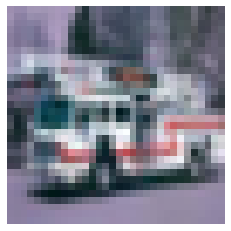

In [52]:
plt.imshow(x_train[1247].astype(np.uint8))
plt.axis("off")
plt.show()



In [53]:
def resize_img(img):
    num_of_images = img.shape[0]
    new_array = np.zeros((num_of_images,48,48,3))
    for i in range(num_of_images):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [54]:
x_train = resize_img(x_train[:5000])
x_test = resize_img(x_test[:5000])
# y_train = resize_img(y_train)
# y_test = resize_img(y_test)

In [55]:
print(x_train[10].shape)

(48, 48, 3)


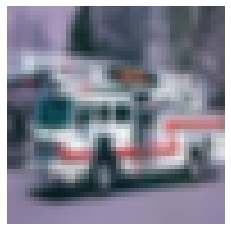

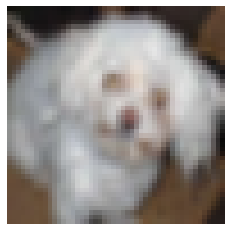

In [59]:
plt.imshow(x_train[1247].astype(np.uint8))
plt.axis("off")
plt.show()


plt.imshow(x_test[1000].astype(np.uint8))
plt.axis("off")
plt.show()


In [60]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))

vgg_layers_list = vgg.layers
model = Sequential()
for layer in vgg_layers_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False
    
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(num_of_classes,activation = "softmax"))





In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [62]:
model.compile(loss="categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

hist = model.fit(x_train,y_train,validation_split = 0.3,epochs=2,batch_size = 250)

Train on 3500 samples, validate on 1500 samples
Epoch 1/2
3500/3500 [==============================] - 104s 30ms/step - loss: 13.8585 - accuracy: 0.3037 - val_loss: 8.5163 - val_accuracy: 0.3873
Epoch 2/2
3500/3500 [==============================] - 101s 29ms/step - loss: 6.9345 - accuracy: 0.4566 - val_loss: 7.5014 - val_accuracy: 0.4000


(1, 48, 48, 3)


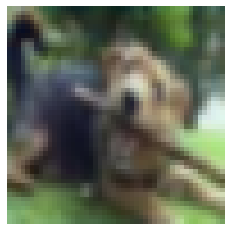

bird


In [73]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions

# convert the image pixels to a numpy array
image = x_test[1453]
# reshape data for the model
image = image.reshape(1,48, 48, 3)

print(image.shape)
yhat = model.predict(image)

yhat = (yhat>=0.5)
tahminler = []


for i in yhat[0]:
    if i >= 0.5:
        tahminler.append(1)
    else:
        tahminler.append(0)
        
image = image.reshape(48,48,3)
        
plt.imshow(image.astype(np.uint8))
plt.axis("off")
plt.show()



# print(tahminler)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classes[tahminler.index(1)])